In [1]:
import os
import sys
module_path = os.path.abspath('..')
sys.path.append(module_path)
from lc.measurements import CurveMeasurements
from lc.curve import LearningCurveEstimator
from omegaconf import OmegaConf
import matplotlib
import matplotlib.pyplot as plt

Load the error measurments

In [2]:
curvems = CurveMeasurements()
curvems.load_from_json('../data/no_pretr_ft.json')
print(curvems)

--
num_train_samples: 25
test_errors: [74.04, 74.48, 74.07, 74.4, 75.95, 74.97, 74.02, 75.8, 74.6, 74.27]
num_ms: 10
--
num_train_samples: 50
test_errors: [57.59, 58.45, 58.13, 58.44, 59.46, 58.14, 58.71, 58.22]
num_ms: 8
--
num_train_samples: 100
test_errors: [45.01, 43.64, 45.06, 44.63]
num_ms: 4
--
num_train_samples: 200
test_errors: [35.36, 35.2]
num_ms: 2
--
num_train_samples: 400
test_errors: [27.92]
num_ms: 1
--



Load config

In [3]:
cfg = OmegaConf.load('../lc/config.yaml')
print(OmegaConf.to_yaml(cfg))

gamma: -0.5
gamma_search: true
gamma_range:
- -1.0
- 0
search_reg_coeff: 5
normalize_objective: false
variance_type: smooth
use_weights: true
ddof: 1
v_0: 0.02
v_1: null
min_n: 20
'N': 400
num_interp_pts: 100
marker_size: 20



Estimate curve

In [4]:
curve_estimator = LearningCurveEstimator(cfg)
curve, objective = curve_estimator.estimate(curvems)

Plot

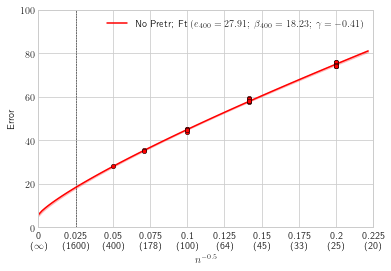

In [5]:
curve_estimator.plot(curve,curvems,label='No Pretr; Ft')